# Chargement des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données

In [37]:
url1 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/train.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
train = pd.read_csv(url1, sep=',') # lecture du dataframe 

print(train.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [13]:
url2 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/test.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
test = pd.read_csv(url2, sep=',') # lecture du dataframe 

print(test.head())

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


# Analyse exploratoire

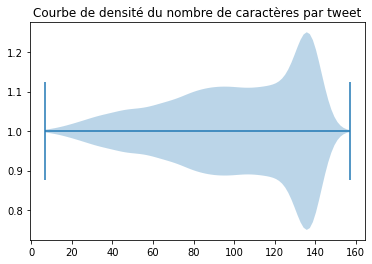

In [40]:
train['text_length'] = [len(text) for text in train['text']]
plt.violinplot(train['text_length'], vert = False)
plt.title('Courbe de densité du nombre de caractères par tweet')
plt.show()

In [14]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [15]:
train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

#Extraction des parties des tweets


In [ ]:
# Correction orthographique

# Conversion chiffres en texte

# Date

# Hashtag

# Liens hypertextes

# Contenu textuel

# Noms propres

# Enrichissement de la localisation

#Nettoyage du contenu textuel des tweets

In [ ]:



# Lemme/Stemmes

# Suppression stopwords

# Suppression mots courts (1-2 caractères)

### PRENETTOYAGE

In [51]:
import re

# Expression régulières : ponctuation, chiffres, accents, majuscules, espaces en trop …

def preprocessing(text):
    text = str(text)

    # Harmonisation - mise en minuscule
    text = text.lower()

    # Gestion des accents et ponctuations
    # text = re.sub("\d+", " ", text) # numbers normalization
    text = re.sub('[éèê]', "e", text) # retrait accents
    text = re.sub("[.,;:!?]", " ", text)
    text = re.sub("[|{}\[\]()«»/]", " ", text)
    text = re.sub("[“”]", " ", text)
    text = re.sub("'", " ", text)
    text = re.sub("’", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub('[+-]', " ", text)
    text = re.sub('[=*/]', " ", text)
    text = re.sub("ô", "o", text)
    text = re.sub("°", "", text)

    # Gestion des symboles
    text = re.sub("[€%$£]", "", text)

    # Gestions des retours à la ligne ou fin de lignes
    text = re.sub('\r\n', " ", text)
    text = re.sub('\n', " ", text)

    # Gestion des espaces
    text = re.sub('\s+', " ", text) # espaces en trop
    text = text.rstrip(" ") # à droite
    text = text.lstrip(" ") # à gauche

    return text

In [52]:
train['text_CLEAN'] = train['text'].apply(lambda x: preprocessing(x))
train[['text','text_CLEAN']].head()

,text,text_CLEAN
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive #wildfires evacuation orders in...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby #alaska as ...


### Lemmatisation / Stemmisation

In [53]:
# Pour cette partie du traitement, les tweets doivent être décomposés en mots
def tokenize(text):
    text_split = [word for word in text.split()]
    return text_split

train['text_CLEAN_TOKEN'] = train['text_CLEAN'].apply(lambda x: tokenize(x))
train[['text_CLEAN','text_CLEAN_TOKEN']].head()

,text_CLEAN,text_CLEAN_TOKEN
0,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #eart..."
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,people receive #wildfires evacuation orders in...,"[people, receive, #wildfires, evacuation, orde..."
4,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #al..."


In [ ]:
# !pip install nltk
import nltk
# nltk.download('all')

In [54]:
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text_lemmatized = [Lemmatizer.lemmatize(word) for word in text]
    return text_lemmatized

train['text_CLEAN_TOKEN_LMT'] = train['text_CLEAN_TOKEN'].apply(lambda x: lemmatize(x))
train[['text_CLEAN_TOKEN','text_CLEAN_TOKEN_LMT']].head()

,text_CLEAN_TOKEN,text_CLEAN_TOKEN_LMT
0,"[our, deeds, are, the, reason, of, this, #eart...","[our, deed, are, the, reason, of, this, #earth..."
1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,"[all, residents, asked, to, shelter, in, place...","[all, resident, asked, to, shelter, in, place,..."
3,"[people, receive, #wildfires, evacuation, orde...","[people, receive, #wildfires, evacuation, orde..."
4,"[just, got, sent, this, photo, from, ruby, #al...","[just, got, sent, this, photo, from, ruby, #al..."


### Stopwords

In [55]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def remove_stopwords(text):
    text_clean = [word for word in text if not word.lower() in stopwords and len(word)>2]
    return text_clean

train['text_CLEAN_TOKEN_LMT_WSW'] = train['text_CLEAN_TOKEN_LMT'].apply(lambda x: remove_stopwords(x))
train[['text_CLEAN_TOKEN_LMT','text_CLEAN_TOKEN_LMT_WSW']].head()
#test

,text_CLEAN_TOKEN_LMT,text_CLEAN_TOKEN_LMT_WSW
0,"[our, deed, are, the, reason, of, this, #earth...","[deed, reason, #earthquake, may, allah, forgive]"
1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, ronge, sask, canada]"
2,"[all, resident, asked, to, shelter, in, place,...","[resident, asked, shelter, place, notified, of..."
3,"[people, receive, #wildfires, evacuation, orde...","[people, receive, #wildfires, evacuation, orde..."
4,"[just, got, sent, this, photo, from, ruby, #al...","[got, sent, photo, ruby, #alaska, smoke, #wild..."


# Modélisation

## Echantillonnage

##GridSearch

In [ ]:
pipe = Pipeline([
    ("TdIdf",TfidfTransformer()),
    ("scaler", StandardScaler(with_mean=False)), # mean = True ne fonctionne pas avec une sparse matrix (TD-IDF)

    # Modèle testé en premier (n'importe lequel)
    ("classifier", LogisticRegression(multi_class='multinomial',random_state=0))
])

 
param_grid = [
    # Régression Logistique (one vs rest)
    {'classifier': [LogisticRegression(multi_class='multinomial',random_state=0)],
     'classifier__C': [1,10,100, 1000, 10000]},

    # Support Vector Machine
    {'classifier': [SVC(kernel='rbf', random_state=0, probability = True)],
     'classifier__C': [10,100]}
             ]

grid = GridSearchCV(pipe, param_grid, verbose = 2, cv = 3) # verbose pour l'affichage du temps de traitement
grid.fit(X_train, y_train)

## Evaluation

In [ ]:
print('best model : ', grid.best_params_)
print('best cv score : ', grid.best_score_)